In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Importing all the necessary libraries
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras import utils

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Great_Learning/Intro to Neural Networks & Deep Learning/Project_2")
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Great_Learning/Intro to Neural Networks & Deep Learning/Project_2'

# Read the data from the h5py file and understand the train/test splits (5 points).

In [4]:
h5f = h5py.File('SVHN_single_grey1.h5','r')
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [5]:
#Loading the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [6]:
#print the shape of training and testing data
print('Training set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32) (42000,)
Validation set: (60000, 32, 32) (60000,)
Test set: (18000, 32, 32) (18000,)


# Reshape and normalize the train and test features (5 points).

In [7]:
#using all the data for training to boost our testset score.
X_train = np.concatenate([X_train, X_val])
y_train = np.concatenate([y_train, y_val])

print('New Training set:', X_train.shape, y_train.shape)

New Training set: (102000, 32, 32) (102000,)


In [8]:
#Reshape the features from 32*32 into a single dimensinal array of 1024 features
X_train=X_train.reshape(102000,1024)
X_test=X_test.reshape(18000,1024)
X_train=X_train.astype('float32')#change the datatype from float to integer(0-255)
X_test=X_test.astype('float32')

In [9]:
from sklearn.utils import shuffle

# Randomly shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

# One hot encode the labels for train and test data (5 points).

In [10]:
# one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

# Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax (5 points).

In [11]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model=Sequential()

#Normalize the data
model.add(BatchNormalization())

#Flatten layer
model.add(Flatten(input_shape=(32, 32)))

model.add(Dense(units=1024,activation='relu',input_shape=(1024,)))

#Output layer
model.add(Dense(num_classes,activation='softmax'))

# Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation (5 points).

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit and evaluate the model. Print the loss and accuracy for the test data (5 points).

In [13]:
batch_size = 256
epochs = 25

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)

# Final evaluation of the model
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)
print()

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 94.465%
Train Loss: 0.193

Test Accuracy: 92.167%
Test Loss: 0.292


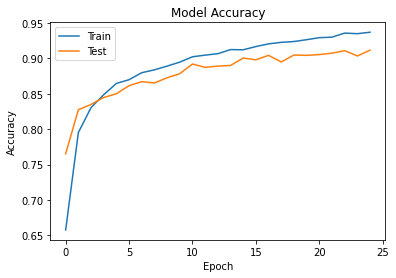

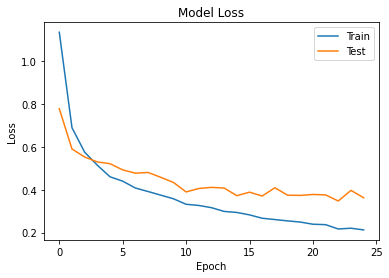

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()